<a href="https://colab.research.google.com/github/grommy/CNN_in_TensorFlow/blob/master/week_4/Sign_language_custom_architecture_with_skip_connections_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [0]:
# uploaded=files.upload()

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [4]:
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/CNN_in_TF/Week4/sign-language-mnist

!cp '/content/gdrive/My Drive/Colab Notebooks/CNN_in_TF/Week4/sign-language-mnist/sign_mnist_train.csv' .
!cp '/content/gdrive/My Drive/Colab Notebooks/CNN_in_TF/Week4/sign-language-mnist/sign_mnist_test.csv' .

american_sign_language.PNG  amer_sign3.png	 sign_mnist_train.csv
amer_sign2.png		    sign_mnist_test.csv


In [5]:
import pandas as pd
X_train = pd.read_csv('sign_mnist_test.csv', nrows=100)
X_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [6]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    images_list = []
    labels_list = []
    with open(filename) as training_file:
      print("{0}".format(training_file.readline().split(',')))
      # Your code starts here
      for _, line in enumerate(training_file):
        row = [int(i) for i in line.split(',')]
        labels_list.append(row[0])
        images_list.append(row[1:785])
        
      images = np.reshape(images_list, (-1,28,28))
      labels = np.array(labels_list)
      
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91'

In [7]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.25,
    zoom_range = 0.15,
    rotation_range = 15,
    brightness_range = [0.15, 1.15],
    width_shift_range = [-2,-1, 0, +1, +2],
    height_shift_range = [ -1, 0, +1],
    fill_mode = 'reflect')

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.25,
    zoom_range = 0.15,
    rotation_range = 15,
    brightness_range = [0.15, 1.15],
    width_shift_range = [-2,-1, 0, +1, +2],
    height_shift_range = [ -1, 0, +1],
    fill_mode = 'reflect')
 
# validation_datagen = ImageDataGenerator(
#       rescale=1./255,
#       rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest'
# )
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [8]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
training_labels_ohe = lb.fit_transform(training_labels)
testing_labels_ohe = lb.transform(testing_labels)


print(training_labels_ohe.shape)
print(training_labels_ohe[:2])
print(testing_labels_ohe[:2])

N_OUTPUTS = training_labels_ohe.shape[1]
print(N_OUTPUTS)

(27455, 24)
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
24


In [14]:
# Define the model using functional API
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv13 = tf.keras.layers.Conv2D(filters=16, 
                               kernel_size=(3,3), 
                               padding='same',
                               activation='relu')(inputs)
batch_norm_13 = tf.keras.layers.BatchNormalization()(conv13)
# temp_output_13 = tf.keras.layers.Concatenate()([inputs, batch_norm_13])
#-----
conv15 = tf.keras.layers.Conv2D(filters=8, 
                               kernel_size=(5,5), 
                               padding='same',
                               activation='relu')(inputs)
batch_norm_15 = tf.keras.layers.BatchNormalization()(conv15)
# temp_output_15 = tf.keras.layers.Concatenate()([inputs, batch_norm_15])
#-------
conv17 = tf.keras.layers.Conv2D(filters=5, 
                               kernel_size=(8,8), 
                               padding='same',
                               activation='relu')(inputs)
batch_norm_17 = tf.keras.layers.BatchNormalization()(conv17)
#----------

temp_output_1 = tf.keras.layers.Concatenate()([inputs, batch_norm_13, batch_norm_15, batch_norm_17])
conv2 = tf.keras.layers.Conv2D(filters=15, 
                               kernel_size=(2,2), 
                               padding='same',
                               activation=None)(temp_output_1)
temp_output_2 = tf.keras.layers.Concatenate()([inputs, conv2])
#--------------
conv3 = tf.keras.layers.Conv2D(filters=32, 
                               kernel_size=(3,3), 
                               padding='valid',
                               activation='relu',
                               name="after_skip")(temp_output_2)
max_pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid')(conv3)

#--------------
conv4 = tf.keras.layers.Conv2D(filters=16, 
                               kernel_size=(2,2), 
                               padding='valid',
                               activation='relu',
                              )(max_pool3)
max_pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid')(conv4)


flatten = tf.keras.layers.GlobalAveragePooling2D()(max_pool3)
output = tf.keras.layers.Dense(units=N_OUTPUTS, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 28, 28, 16)   160         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 28, 28, 8)    208         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 28, 28, 5)    325         input_6[0][0]                    
____________________________________________________________________________________________

In [0]:
# Compile Model. 
from tensorflow.keras.optimizers import RMSprop, Adam
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [0]:
# # Define the model
# inputs = tf.keras.layers.Input(shape=(28, 28, 1))
# conv1 = tf.keras.layers.Conv2D(filters=16, 
#                                kernel_size=(3,3), 
#                                padding='valid',
#                                activation='relu')(inputs)
# batch_norm_1


# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
#     tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(24, activation='softmax')
# ])

# model.summary()

# # Compile Model. 
# from tensorflow.keras.optimizers import RMSprop
# model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 13, 13, 16)        64        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 9, 9, 16)          4624      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 4, 4, 16)         

In [0]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='model_skip_conn_multiwindow.h5',
                             monitor='val_acc', 
                             save_best_only=True, 
                             load_weights_on_restart=True,
                            )
earlystopping = EarlyStopping(monitor='val_acc',
                             patience=3)

In [17]:
# Train the Model
BS = 32
EPOCHS = 20

history = model.fit_generator(
     train_datagen.flow(training_images, training_labels_ohe, batch_size=BS),
	   validation_data=validation_datagen.flow(testing_images, testing_labels_ohe, batch_size=BS),
	   steps_per_epoch=len(training_images) // BS,
     epochs=EPOCHS,
     callbacks=[checkpoint, earlystopping]
)

Epoch 1/20
857/857 [==============================] - 32s 37ms/step - loss: 2.5105 - acc: 0.2333 - val_loss: 2.3298 - val_acc: 0.2818
Epoch 2/20
857/857 [==============================] - 29s 34ms/step - loss: 1.6425 - acc: 0.4770 - val_loss: 1.6068 - val_acc: 0.4651
Epoch 3/20
857/857 [==============================] - 29s 34ms/step - loss: 1.2220 - acc: 0.6033 - val_loss: 1.5801 - val_acc: 0.5011
Epoch 4/20
857/857 [==============================] - 29s 34ms/step - loss: 0.9772 - acc: 0.6840 - val_loss: 1.1479 - val_acc: 0.6263
Epoch 5/20
857/857 [==============================] - 29s 34ms/step - loss: 0.8271 - acc: 0.7314 - val_loss: 0.9427 - val_acc: 0.6807
Epoch 6/20
857/857 [==============================] - 29s 34ms/step - loss: 0.7119 - acc: 0.7684 - val_loss: 0.9084 - val_acc: 0.7006
Epoch 7/20
857/857 [==============================] - 29s 34ms/step - loss: 0.6266 - acc: 0.7970 - val_loss: 0.7640 - val_acc: 0.7381
Epoch 8/20
857/857 [==============================] - 29s 34ms

In [18]:
history_2 = model.fit_generator(
     train_datagen.flow(training_images, training_labels_ohe, batch_size=BS),
	   validation_data=validation_datagen.flow(testing_images, testing_labels_ohe, batch_size=BS),
	   steps_per_epoch=len(training_images) // BS,
     epochs=EPOCHS,
     callbacks=[checkpoint, earlystopping]
)

Epoch 1/20
857/857 [==============================] - 28s 32ms/step - loss: 0.2027 - acc: 0.9371 - val_loss: 0.3990 - val_acc: 0.8705
Epoch 2/20
857/857 [==============================] - 28s 33ms/step - loss: 0.1901 - acc: 0.9410 - val_loss: 0.6085 - val_acc: 0.8161
Epoch 3/20
857/857 [==============================] - 28s 33ms/step - loss: 0.1877 - acc: 0.9417 - val_loss: 0.3237 - val_acc: 0.9045
Epoch 4/20
857/857 [==============================] - 27s 32ms/step - loss: 0.1733 - acc: 0.9485 - val_loss: 0.5233 - val_acc: 0.8477
Epoch 5/20
857/857 [==============================] - 28s 32ms/step - loss: 0.1706 - acc: 0.9495 - val_loss: 0.3141 - val_acc: 0.9120
Epoch 6/20
857/857 [==============================] - 27s 32ms/step - loss: 0.1590 - acc: 0.9526 - val_loss: 0.6204 - val_acc: 0.8281
Epoch 7/20
857/857 [==============================] - 28s 32ms/step - loss: 0.1490 - acc: 0.9553 - val_loss: 0.2872 - val_acc: 0.9168
Epoch 8/20
857/857 [==============================] - 28s 32ms

In [0]:
best_model = tf.keras.models.load_model('model_skip_conn_multiwindow.h5')

In [22]:
best_model.evaluate(testing_images, testing_labels_ohe)

7172/7172 [==============================] - 1s 176us/sample - loss: 16.5667 - acc: 0.9689


[16.56674481389267, 0.9689069]

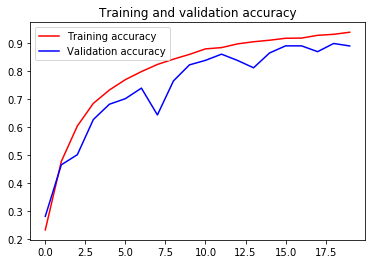

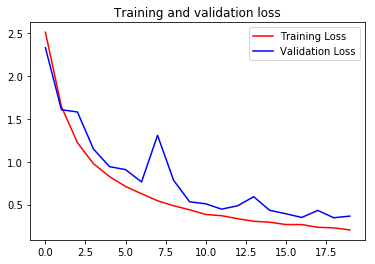

In [23]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Conclusion: 
* nice technic
* stack more layers